In [22]:
import math
import numpy as np
import pandas as pd
import os, sys, shutil
import scipy.stats as st
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold

In [78]:
file = r'C:\Users\EnviSAGEPC\Desktop\Hidden Markov\Image\S2B_MSIL2A_021718\Training\Training.csv'
file2 = r'C:\Users\EnviSAGEPC\Desktop\Hidden Markov\Image\S2B_MSIL2A_021718\Test\Test.csv'
test = pd.read_csv(file)
test2 = pd.read_csv(file2)
X_train = test.iloc[:,0:-1]
y_train = test.iloc[:,-1]
X_test = test2.iloc[:,0:-1]
y_test = test2.iloc[:,-1] 

In [61]:
for i in range(50)[2::]:
    est = []
    est.append(('scale', StandardScaler()))
    est.append(('RF', RandomForestClassifier(n_estimators=1000, min_samples_split=i)))
    model = Pipeline(est)
    model.fit(X_train,y_train)
    print (i, model.score(X_test, y_test))

2 0.9566088117489987
3 0.955607476635514
4 0.9566088117489987
5 0.9569425901201603
6 0.9572763684913218
7 0.9572763684913218
8 0.9552736982643525
9 0.9572763684913218
10 0.9569425901201603
11 0.9562750333778371
12 0.9562750333778371
13 0.9562750333778371
14 0.9542723631508678
15 0.9559412550066756
16 0.9552736982643525
17 0.9539385847797063
18 0.9546061415220294
19 0.9526034712950601
20 0.9549399198931909
21 0.9539385847797063
22 0.9536048064085447
23 0.9529372496662216
24 0.9532710280373832
25 0.9532710280373832
26 0.9516021361815754
27 0.9526034712950601
28 0.9516021361815754
29 0.951935914552737
30 0.9499332443257676
31 0.9516021361815754
32 0.9499332443257676
33 0.9509345794392523
34 0.9492656875834445
35 0.9479305740987984
36 0.9485981308411215
37 0.9469292389853138
38 0.9485981308411215
39 0.9472630173564753
40 0.94826435246996
41 0.9462616822429907
42 0.9462616822429907
43 0.9465954606141522
44 0.9455941255006676
45 0.9465954606141522
46 0.9455941255006676
47 0.945260347129506
4

In [63]:
RF = RandomForestRegressor(n_estimators=1000, random_state=100, min_samples_split=6)
RF.fit(X_train,y_train)

#Predict Unseen Data
prediction = RF.predict(X_test)

#Performance metrics 
errors = abs(prediction - y_test)

print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.09 degrees.
Accuracy: 95.65 %.


In [65]:
feature = list(test.columns)
# Get numerical feature importances
importances = list(RF.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
feature_list = [('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

for pair in feature_list:
    print (pair)

Variable: NBI                  Importance: 0.67
Variable: SAVI                 Importance: 0.05
Variable: B8                   Importance: 0.04
Variable: B9                   Importance: 0.04
Variable: B10                  Importance: 0.04
Variable: EVI                  Importance: 0.04
Variable: NDWI                 Importance: 0.04
Variable: B1                   Importance: 0.03
Variable: NDBI                 Importance: 0.02
Variable: B4                   Importance: 0.01
Variable: AWEInsh              Importance: 0.01
Variable: B2                   Importance: 0.0
Variable: B3                   Importance: 0.0
Variable: B5                   Importance: 0.0
Variable: B6                   Importance: 0.0
Variable: B7                   Importance: 0.0
Variable: NDVI                 Importance: 0.0
Variable: MNDWI                Importance: 0.0


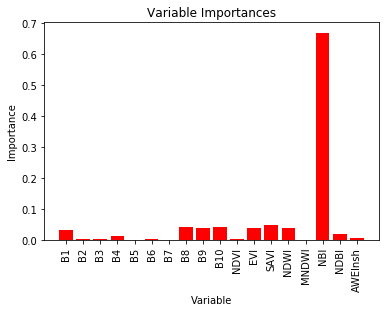

In [67]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

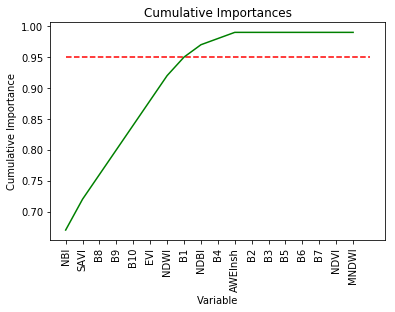

In [68]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [89]:
X_train = pd.concat([X_train['NBI'], X_train['SAVI'], X_train['B8'], X_train['B9'], X_train['B10'], X_train['EVI'],\
                    X_train['NDWI'], X_train['B1'], X_train['NDBI'], X_train['B4'], X_train['AWEInsh'], X_train['B2'],\
                    X_train['B3'], X_train['B5'], X_train['B6'], X_train['B7'], X_train['NDVI'], X_train['MNDWI']], axis=1)
X_test = pd.concat([X_test['NBI'], X_test['SAVI'], X_test['B8'], X_test['B9'], X_test['B10'], X_test['EVI'],\
                    X_test['NDWI'], X_test['B1'], X_test['NDBI'], X_test['B4'], X_test['AWEInsh'], X_test['B2'],\
                    X_test['B3'], X_test['B5'], X_test['B6'], X_test['B7'], X_test['NDVI'], X_test['MNDWI']], axis=1)

score = []

for i in range(len(X_train.columns)+1)[1::]:
    print ('No. of Variables: ', i)
    RF = RandomForestRegressor(n_estimators=1000, random_state=100, min_samples_split=6)
    RF.fit(X_train.iloc[:,0:i],y_train)

    #Predict Unseen Data
    prediction = RF.predict(X_test.iloc[:,0:i])

    #Performance metrics 
    errors = abs(prediction - y_test)

    print('Metrics for Random Forest Trained on Original Data')
    print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)

    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    score.append(accuracy)
    print('Accuracy:', round(accuracy, 2), '%.')
    print ("-------------------------------------------------------------------------------------------------------------------")

No. of Variables:  1
Metrics for Random Forest Trained on Original Data
Average absolute error: 0.69 degrees.
Accuracy: 82.03 %.
-------------------------------------------------------------------------------------------------------------------
No. of Variables:  2
Metrics for Random Forest Trained on Original Data
Average absolute error: 0.16 degrees.
Accuracy: 93.35 %.
-------------------------------------------------------------------------------------------------------------------
No. of Variables:  3
Metrics for Random Forest Trained on Original Data
Average absolute error: 0.15 degrees.
Accuracy: 94.0 %.
-------------------------------------------------------------------------------------------------------------------
No. of Variables:  4
Metrics for Random Forest Trained on Original Data
Average absolute error: 0.16 degrees.
Accuracy: 93.71 %.
-------------------------------------------------------------------------------------------------------------------
No. of Variables:  5


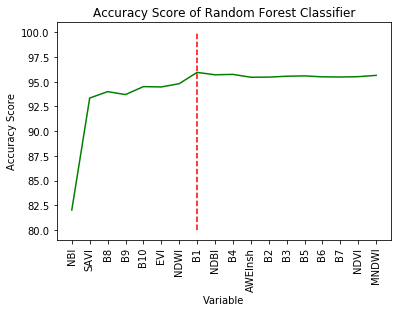

In [92]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, score, 'g-')

# Draw line at 95% of importance retained
plt.vlines(ymin = 80.0, ymax=100.0, x = 7, color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Accuracy Score'); plt.title('Accuracy Score of Random Forest Classifier');